In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

 99% 2.02G/2.04G [00:16<00:00, 194MB/s]
100% 2.04G/2.04G [00:16<00:00, 134MB/s]


In [7]:
from zipfile import ZipFile
dataset = '/content/plantvillage-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
base_dir = '/content/plantvillage dataset/color'

(256, 256, 3)


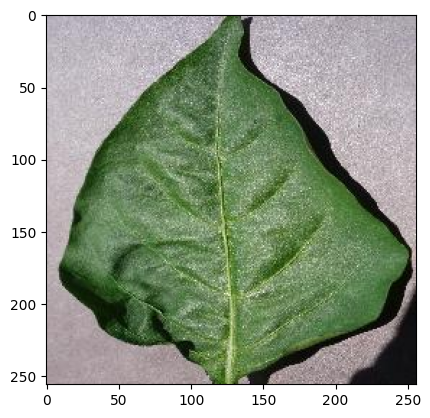

In [9]:
image_path = '/content/plantvillage dataset/color/Pepper,_bell___healthy/00100ffa-095e-4881-aebf-61fe5af7226e___JR_HL 7886.JPG'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(image_path)


print(img.shape)
plt.imshow(img)
plt.axis()
plt.show()

In [10]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
img = mpimg.imread(image_path)
print(img)

[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


In [11]:
import shutil

folder_path = '/content/plantvillage dataset/augmented'

try:
    # Delete the folder and its contents
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' deleted successfully.")
except Exception as e:
    print(f"Error deleting folder '{folder_path}': {e}")


Error deleting folder '/content/plantvillage dataset/augmented': [Errno 2] No such file or directory: '/content/plantvillage dataset/augmented'


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os

base_directory = '/content/plantvillage dataset/segmented'


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

output_directory = '/content/plantvillage dataset/augmented'


num_subdirectories_to_augment = 3


subdirectory_count = 0
for subdirectory in os.listdir(base_directory):
    subdirectory_path = os.path.join(base_directory, subdirectory)

    if os.path.isdir(subdirectory_path):
        print(f"Augmenting images in {subdirectory}...")

        output_subdirectory = os.path.join(output_directory, subdirectory + '_augmented')
        os.makedirs(output_subdirectory, exist_ok=True)

        for filename in os.listdir(subdirectory_path):
            img_path = os.path.join(subdirectory_path, filename)

            if os.path.isfile(img_path):
                img = image.load_img(img_path, target_size=(256, 256))
                x = image.img_to_array(img)
                x = x.reshape((1,) + x.shape)


                i = 0
                for batch in datagen.flow(x, batch_size=1, save_to_dir=output_subdirectory, save_prefix='aug', save_format='jpeg'):
                    i += 1
                    if i >= 2:
                        break

        subdirectory_count += 1

        if subdirectory_count >= num_subdirectories_to_augment:
            break

print("**data augmentation completed")


Augmenting images in Apple___healthy...
Augmenting images in Orange___Haunglongbing_(Citrus_greening)...
Augmenting images in Grape___Black_rot...
**data augmentation completed


In [16]:
data_gen = ImageDataGenerator(
    validation_split=0.2
)

In [17]:
base_dir = '/content/plantvillage dataset/augmented'
batch_size = 32
train_generator = data_gen.flow_from_directory(
    base_dir,
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 9356 images belonging to 3 classes.


In [18]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 2337 images belonging to 3 classes.


In [19]:
img_size = 224
batch_size = 32


In [20]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_1 (Dense)             (None, 256)              

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])